In [1]:
import os
from io import open 

"""Writing the data per file into a dictionary for which the key is the category of news"""

import unicodedata
import string

all_letters = string.ascii_letters + ".,;'& "
n_letters = len(all_letters)

def unitoAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

def readFile_byline(filename):
    line_of_news = open("news_data_final/"+filename , encoding = 'utf-8').read().split('\n')    
    return [unitoAscii(line) for line in line_of_news]

In [2]:
category_news = {}
all_categories = []

list_of_files = os.listdir("news_data_final/")

#Dictionary which maps every category of news to it's description
for _file in list_of_files:
    category = _file.split(".")[0]
    all_categories.append(category)
    news_descp = readFile_byline(_file)
    category_news[category] = news_descp

num_categories = len(all_categories)
print(num_categories)

count_of_news_category = {}
average_words_per_number_of_samples = []

#Counting news items per category of news 
for key in category_news.keys():
    item = category_news.get(key)
    number_of_news_items = len(item)
    count_of_news_category[key] = number_of_news_items
    count_of_words = 0
    for sentence in item:
        count_of_words += len(sentence.split(" "))
    average_words_per_number_of_samples.append(count_of_words/number_of_news_items)

#print(count_of_news_category["WELLNESS"])
#print(category_news["CRIME"][0:2])
#print(average_words_per_number_of_samples)

29


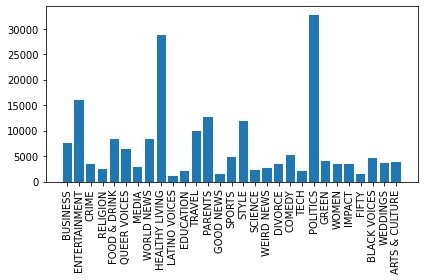

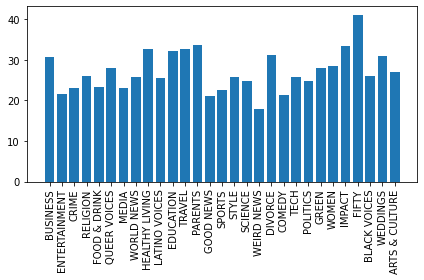

In [3]:
import random
import matplotlib
import matplotlib.pyplot as plt 

path = os.getcwd()
folder = "figs"
FILE = "Number_of_articles_per_category.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure()
category = count_of_news_category.keys()
value = count_of_news_category.values()
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(path_save)
plt.show()

path = os.getcwd()
folder = "figs"
FILE = "Words_per_category.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)



fig1 = plt.figure()
category = count_of_news_category.keys()
value = average_words_per_number_of_samples
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(path_save)
plt.show()

In [4]:
import torch
import torch.nn as nn 
from torch import optim
import torch.nn.functional as F 

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print(device)

def findIndexOfWordInSentence(sentence):
    indexOfWord = {}
    for index, word in enumerate(sentence):
        indexOfWord[word] = index
    return list(indexOfWord.values())

def sentenceToTensor(sentence):
    indexes = findIndexOfWordInSentence(sentence)
    return torch.tensor(indexes , dtype = torch.long, device = device).view(-1, 1)

category_plus_news_list = []

from nltk.corpus import stopwords

for key in category_news.keys():
    for news_item in category_news[key]:
        #news_item = [word for word in news_item.split(" ") if word not in stopwords.words('english')]
        #news_item = " ".join(word for word in news_item)
        category_plus_news_list.append((key, news_item))

print(category_plus_news_list[0])

def pairedTensor(pair):
    #pair is element in category_plus_news_list
    input_tensor = sentenceToTensor(pair[1])
    output_tensor = sentenceToTensor(pair[0])
    return (input_tensor, output_tensor)

#print(pairedTensor(category_plus_news_list[100]))

unique_words = []

'''for pair in category_plus_news_list:
    for word in pair[1].split(" "):
        if word.lower() not in unique_words:
            unique_words.append(word.lower())

print(unique_words[0:50])'''

cuda:1
('BUSINESS', 'U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.')


'for pair in category_plus_news_list:\n    for word in pair[1].split(" "):\n        if word.lower() not in unique_words:\n            unique_words.append(word.lower())\n\nprint(unique_words[0:50])'

In [5]:
list_of_sentences_business = []
list_of_sentences_politics = []
list_of_sentences_religion = []
list_of_sentences_food = []
list_of_sentences_home = []

list_of_sentences = []

labels =[]
count_of_lables=[]

for pair in category_plus_news_list:
    label = pair[0]
    sentences = pair[1]
    
    list_of_sentences.append(sentences)
    labels.append(label)
    '''for sentence in sentences:
        if len(sentence.split(" ")) >= 5:
            list_of_sentences.append(sentence)
            labels.append(label)'''
            
    
#print(list_of_sentences[0:20])
print(len(list_of_sentences))
#print((labels[0:20]))



200882


In [6]:
label_list = list(category_news.keys())
index_class_map_dict1={}

for idx, value in enumerate(label_list):
    index_class_map_dict1[value]=idx

print(index_class_map_dict1)
label_values = list(index_class_map_dict1.values())

{'BUSINESS': 0, 'ENTERTAINMENT': 1, 'CRIME': 2, 'RELIGION': 3, 'FOOD & DRINK': 4, 'QUEER VOICES': 5, 'MEDIA': 6, 'WORLD NEWS': 7, 'HEALTHY LIVING': 8, 'LATINO VOICES': 9, 'EDUCATION': 10, 'TRAVEL': 11, 'PARENTS': 12, 'GOOD NEWS': 13, 'SPORTS': 14, 'STYLE': 15, 'SCIENCE': 16, 'WEIRD NEWS': 17, 'DIVORCE': 18, 'COMEDY': 19, 'TECH': 20, 'POLITICS': 21, 'GREEN': 22, 'WOMEN': 23, 'IMPACT': 24, 'FIFTY': 25, 'BLACK VOICES': 26, 'WEDDINGS': 27, 'ARTS & CULTURE': 28}


In [7]:
number_labels=[]

for label in labels:
    number_labels.append(index_class_map_dict1[label])

In [8]:
import torch
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

import random
random.seed(0)

In [9]:
from sklearn.model_selection import train_test_split

train_texts = list_of_sentences
train_labels = number_labels

train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2)


print(len(train_texts))
print(len(train_labels))
print(len(val_texts))

160705
160705
40177


In [10]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, return_tensors='pt', truncation=True, padding=True)
val_encodings = tokenizer(val_texts, return_tensors='pt', truncation=True, padding=True)
print(train_encodings.keys())

dict_keys(['input_ids', 'attention_mask'])


In [11]:
class newsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: (val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = newsDataset(train_encodings, train_labels)
#print((train_dataset).__getitem__(3))
val_dataset = newsDataset(val_encodings, val_labels)


In [12]:
from sklearn.metrics import f1_score
import numpy as np

y_pred = np.array([ 4, 13,  6, 13,  5,  2,  2,  6,  6,  6,  2,  6,  6,  2,  2,  6])
y_true = np.array([27, 21,  4, 21,  8, 12,  0,  8,  8, 6,  7,  8, 21, 12, 21, 11])

print(f1_score(y_true, y_pred, average="macro"))


0.020833333333333332


In [13]:
from torch.utils.data import DataLoader

from transformers import DistilBertForSequenceClassification, AdamW
from torch.nn import functional as F
import torch.nn
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

device = torch.device('cuda:1') if torch.cuda.is_available() else torch.device('cpu')

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels = 29)
model.to(device)

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

num_of_items_per_class = [7645, 16059, 3406, 2557, 8323, 6315, 2816, 8421, 28717, 1130, 2149, 9888, 12633, 1399, 4885, 11904, 2179, 2671, 3427, 5176, 2083, 32740, 3946, 3491, 3460, 1402, 4529, 3652, 3879]
weights = []
for i in num_of_items_per_class:
    weights.append(1/i)
    
class_weights = torch.FloatTensor(weights).to(device)

train_losses = []
train_acc = []
val_losses = []
val_acc = []
running_loss = 0
running_acc = 0

path = os.getcwd()

folder = "bert_model"
FILE = "model.pth"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

checkpoint = torch.load(path_save)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']



Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [14]:

f1_score_macro = []
f1_score_raw = []


pred_temp = 0
true_temp = 0
y_true = []
y_pred = []
epoch = 10

all_actual_targets = []
all_top_three_preds = []

model.eval()

for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    outputs = model(input_ids, attention_mask=attention_mask)
    loss = F.cross_entropy(outputs.logits, labels, class_weights)
    running_loss += loss.item()
    
    #Top three predictions for MRR calculation
    values, indices = torch.topk(outputs.logits , 3)
    
    top_three_preds = indices.cpu().detach().numpy()
    actual_targets = labels.cpu().detach().numpy()
    
    for item1 in top_three_preds:
        all_top_three_preds.append(item1)
        
    for item2 in actual_targets:
        all_actual_targets.append(item2)
    
    accuracy = (outputs.logits.argmax(-1) == labels).float().sum()
    running_acc += accuracy.item()

    #predictions for f1 score
    pred_temp = outputs.logits.argmax(-1).cpu().detach().numpy()
    true_temp = labels.cpu().detach().numpy()


    for item in pred_temp:
        y_pred.append(item)

    for item in true_temp:
        y_true.append(item)
                

In [15]:
ranks = [] 

for value in range(len(all_actual_targets)):
    if all_actual_targets[value] == all_top_three_preds[value][0]:
        ranks.append(1)
    elif all_actual_targets[value] == all_top_three_preds[value][1]:
        ranks.append(2)
    elif all_actual_targets[value] == all_top_three_preds[value][2]:
        ranks.append(3)
    else:
        ranks.append(0)

def meanReciprocalRank(arrayOfRanks):
    _sum = 0
    for i in arrayOfRanks:
        
        if i != 0:
            _sum += 1/i
        else:
            _sum += i
            
    return _sum/len(arrayOfRanks)


def accuracy(predicted, target):
    count = 0
    for i in range(len(predicted)):
        
        if predicted[i][0] == target[i]:
            count +=1
            
    return count/len(predicted)


def accuracyTop3(predicted, target):
    count = 0
    for i in range(len(predicted)):
        
        if predicted[i][0] == target[i] or predicted[i][1] == target[i] or predicted[i][2] == target[i]:
            count +=1
            
    return count/len(predicted)
        

In [16]:
print("val_loss for epoch = {epoch}".format(epoch = epoch), "is", running_loss/len(val_loader))
val_losses.append(running_loss/len(val_loader))
running_loss = 0
print("val_acc for epoch = {epoch}".format(epoch = epoch), "is", running_acc/len(val_texts))
val_acc.append(running_acc/len(val_texts))
running_acc = 0



print("Accuracy for top prediction is :", accuracy(all_top_three_preds, all_actual_targets))
print("Accuracy for top 3 predictions is :", accuracyTop3(all_top_three_preds, all_actual_targets))
print("Mean Reciprocal Rank for top 3 predictions is :" , meanReciprocalRank(ranks))


f1score = f1_score(y_true, y_pred, average="macro")
f1score_none = f1_score(y_true, y_pred, average=None)

print("F1 macro score for epoch = {epoch}".format(epoch = epoch), "is", f1score)
print("F1 raw score for epoch = {epoch}".format(epoch = epoch), "is", f1score_none)

f1_score_macro.append(f1score)
f1_score_raw.append(f1score_none)

val_loss for epoch = 10 is 2.008958285328173
val_acc for epoch = 10 is 0.7049306817333301
Accuracy for top prediction is : 0.7049306817333301
Accuracy for top 3 predictions is : 0.8929238121313189
Mean Reciprocal Rank for top 3 predictions is : 0.7910744953580187
F1 macro score for epoch = 10 is 0.6258950729400262
F1 raw score for epoch = 10 is [0.61279251 0.73355155 0.62315789 0.58021134 0.8053467  0.71666051
 0.59213974 0.72209166 0.7666332  0.49122807 0.53296193 0.80908203
 0.73513514 0.41911765 0.73563218 0.83673049 0.56548857 0.46655518
 0.77683616 0.53859964 0.56537983 0.7828312  0.60530973 0.41171935
 0.37444655 0.377858   0.53753582 0.83378747 0.60213702]


In [17]:
c_matrix = confusion_matrix(y_true, y_pred, labels=label_values, normalize = "true")


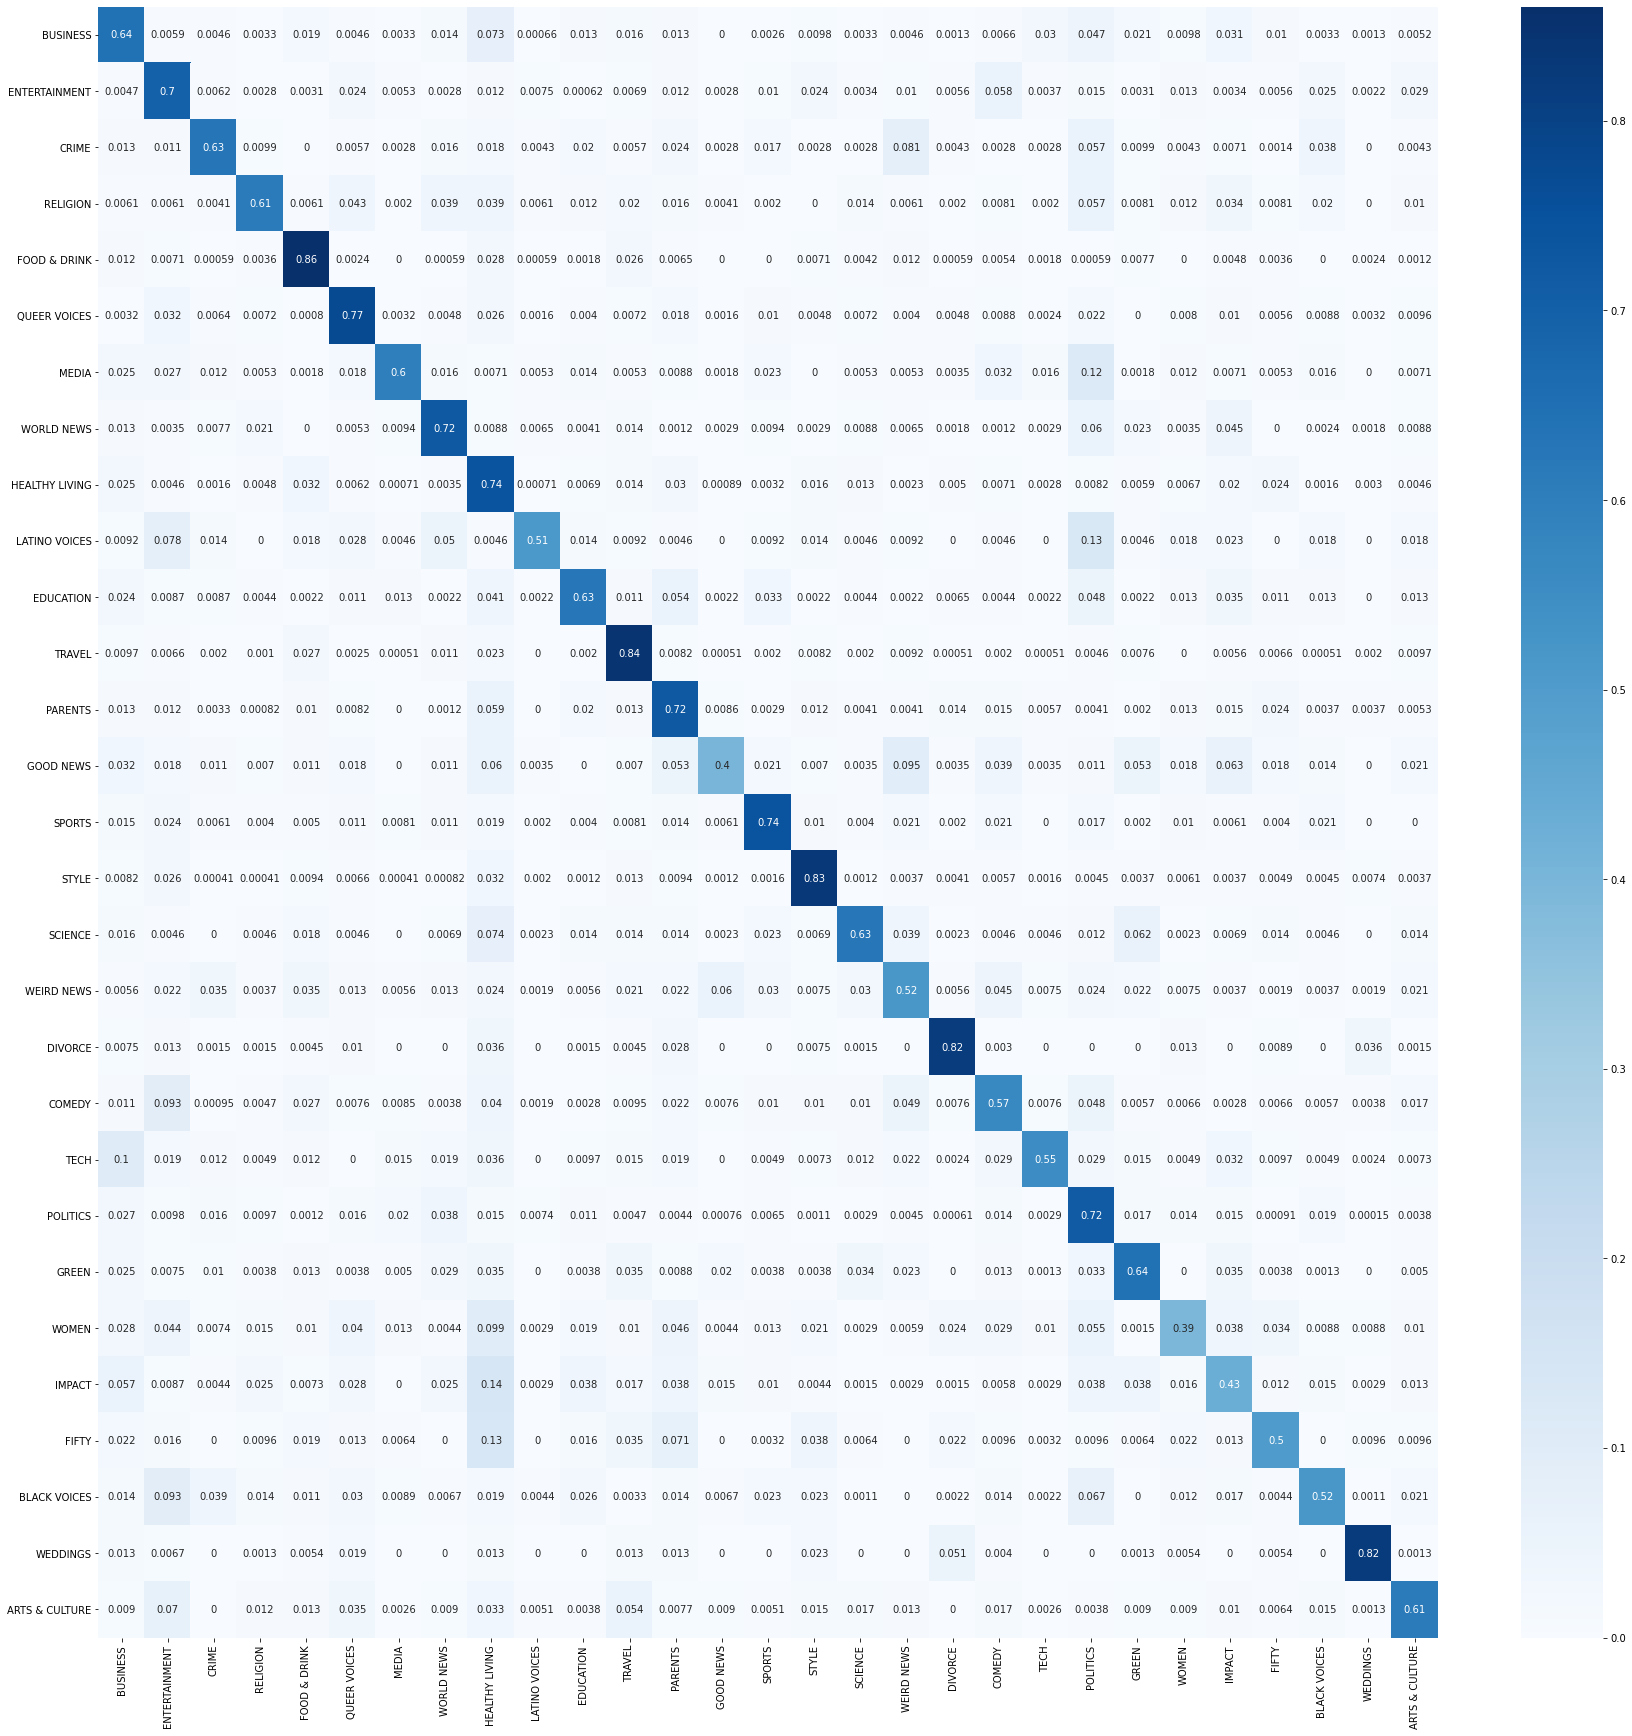

In [18]:
import pandas as pd
import seaborn as sns
from pylab import savefig

df_cm = pd.DataFrame(c_matrix, index = label_list,columns = label_list)
plt.rcParams['figure.figsize'] = (30,30)
matrix1 = sns.heatmap(df_cm, annot=True, cmap='Blues')


In [19]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np

epochs =[]

for i in range(10):
    epochs.append(i)

'''plt.figure(figsize=(10,10))
plt.plot(epochs, train_losses, linewidth=5)
plt.plot(epochs, val_losses, linewidth=5)
plt.legend(['train loss', 'val loss'], loc = 'upper right')

path = os.getcwd()
folder = "figs"
FILE = "loss-bert.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

plt.savefig(path_save)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(epochs, val_acc, linewidth =5)
plt.legend(['val_acc'], loc = 'upper right')

path = os.getcwd()
folder = "figs"
FILE = "acc-bert.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

plt.savefig(path_save)
plt.show()'''

path = os.getcwd()
folder = "figs"
FILE = "confusion_matrix_unweighted.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

figure = matrix1.get_figure()    
figure.savefig(path_save, dpi=500)

f = open("values.txt",'w')
for i in range(len(epochs)):
    
    #f.write("train_loss for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_losses[i]) + "\n")
    #f.write("train_acc for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_acc[i]) + "\n")
    f.write("val_loss for epoch = {epoch}".format(epoch = epochs[0]+10) + " is " + str(val_losses[0]) + "\n")
    f.write("val_acc for epoch = {epoch}".format(epoch = epochs[0]+10) + " is " + str(val_acc[0]) + "\n")
    f.write("F1 macro score for epoch = {epoch}".format(epoch = epochs[0]+10) + " is " + str(f1_score_macro[0]) + "\n")
    f.write("F1 macro raw for epoch = {epoch}".format(epoch = epochs[0]+10) + " is " + str(f1_score_raw[0]) + "\n")
    f.write("\n""\n")
f.close()
    
    

In [119]:
'''import os
import shutil

path = os.getcwd()

shutil.rmtree("bert_model")
os.mkdir("bert_model")

folder = "bert_model"
FILE = "model.pth"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss
            }, path_save)'''